# Model Benchmarking

This notebook will perform exploration via model and model hyperparameter searching of possible shallow models using SKLearn built in algorithms.

I use data constructed by Feature_Engineering.ipynb and model searching functionality from SKL_search.py 

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import warnings
from SKL_search import *
warnings.filterwarnings("ignore")

In [300]:
#untie local dependency
import os
cwd = os.getcwd().split('\\')
local_repo_path = '\\'.join(cwd[:-1])
raw_data_path = local_repo_path + r'\data\raw'
processed_data_path = local_repo_path + '\data\processed'
feature_path = local_repo_path + r'\\data\\features'

# Choose feature set to benchmark against and construct data sets

In [306]:
output_feature_fname = 'raw_sel'
sj_feature_train = pd.read_csv(feature_path + r'\\sj_train_' + output_feature_fname + '.csv', index_col=0).drop('weekofyear', axis = 1)
sj_feature_test = pd.read_csv(feature_path + r'\\sj_test_' + output_feature_fname + '.csv', index_col=0)
iq_feature_train = pd.read_csv(feature_path + r'\\iq_train_' + output_feature_fname + '.csv', index_col=0).drop('weekofyear', axis = 1)
iq_feature_test = pd.read_csv(feature_path + r'\\iq_test_' + output_feature_fname + '.csv', index_col=0)

In [346]:
from sklearn.model_selection import train_test_split
X_tr_sj, X_val_sj, Y_tr_sj, Y_val_sj = train_test_split(sj_feature_train.drop('total_cases', axis = 1), sj_feature_train['total_cases'], test_size = 0.05, random_state = 4)
X_tr_iq, X_val_iq, Y_tr_iq, Y_val_iq = train_test_split(iq_feature_train.drop('total_cases', axis = 1), iq_feature_train['total_cases'], test_size = 0.05, random_state = 4)

In [308]:
X_tr_sj.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,poly_fit
703,0.244758,0.215749,0.067381,-0.272727,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,63.845509
618,-0.845553,-0.870244,-0.612557,-1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.085178
490,0.580787,0.537422,0.643185,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,65.877086
214,0.070440,0.076376,0.434916,0.227273,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.009322
759,-0.640537,-0.666202,-0.673813,-0.772727,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48.519782


In [309]:
X_tr_iq.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,poly_fit
25,-2.059079,-2.432264,0.675826,-0.214286,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,15.484342
138,0.303388,0.296975,1.887947,1.142857,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.051434
365,-0.975500,-0.975252,-0.788821,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.512889
506,0.947698,0.885060,-0.064915,-0.214286,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.248927
413,-0.994961,-0.995784,0.000000,-2.500000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.518898


# Benchmark SJ city

# SKLearn broad model search

In [310]:
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, GradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn import linear_model

In [397]:
models1 = { 
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'LinearRegression': linear_model.LinearRegression()
}

params1 = {  
    'RandomForestRegressor': { 'n_estimators': [5,10, 100], 'max_depth':[5,10]},
    'GradientBoostingRegressor': { 'n_estimators': [10,20, 50, 100], 'max_features': ['auto', 'sqrt'] },
    'SVR': [
        {'kernel': ['linear'], 'C': [0.05, 0.01], 'degree':[1], 'epsilon':[0.2, 0.5, 1]}],
    'LinearRegression': {'n_jobs':[-1]}
    
}

In [398]:
sj_helper = EstimatorSelectionHelper(models1, params1)
sj_helper.fit(X_tr_sj, Y_tr_sj, scoring='neg_mean_absolute_error', cv = 2)

Running GridSearchCV for RandomForestRegressor.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.1s finished


Running GridSearchCV for GradientBoostingRegressor.
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    2.9s finished


Running GridSearchCV for SVR.
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    3.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.0s finished


Running GridSearchCV for LinearRegression.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s finished


In [399]:
sj_skl_models = sj_helper.score_summary(sort_by='min_score')
sj_skl_models

,estimator,min_score,mean_score,max_score,std_score,C,degree,epsilon,kernel,max_depth,max_features,n_estimators,n_jobs
14,SVR,-21.8792,-21.8465,-21.8138,0.0327289,0.05,1,0.2,linear,NaN,NaN,NaN,NaN
17,SVR,-21.8843,-21.8678,-21.8513,0.0164981,0.01,1,0.2,linear,NaN,NaN,NaN,NaN
15,SVR,-21.8924,-21.8498,-21.8072,0.0425963,0.05,1,0.5,linear,NaN,NaN,NaN,NaN
18,SVR,-21.8957,-21.8723,-21.8488,0.0234738,0.01,1,0.5,linear,NaN,NaN,NaN,NaN
16,SVR,-21.8975,-21.8562,-21.8149,0.0413458,0.05,1,1,linear,NaN,NaN,NaN,NaN
19,SVR,-21.9229,-21.8919,-21.8608,0.0310673,0.01,1,1,linear,NaN,NaN,NaN,NaN
7,GradientBoostingRegressor,-24.4272,-24.2505,-24.0738,0.176728,NaN,NaN,NaN,NaN,NaN,auto,20,NaN
8,GradientBoostingRegressor,-24.4638,-24.3334,-24.203,0.130395,NaN,NaN,NaN,NaN,NaN,auto,50,NaN
2,RandomForestRegressor,-24.5215,-24.4368,-24.3521,0.084672,NaN,NaN,NaN,NaN,5,NaN,100,NaN
6,GradientBoostingRegressor,-24.8107,-24.5829,-24.3551,0.227792,NaN,NaN,NaN,NaN,NaN,auto,10,NaN


In [386]:
SVR_mod = SVR(C = 0.05, degree = 1, epsilon = 0.2, kernel = 'linear')
GB_mod = GradientBoostingRegressor(n_estimators = 20)

In [387]:
def fit_and_predict(train, test, mod):
    mod.fit(train.drop('total_cases', axis = 1), train['total_cases'])
    test_preds = mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))
    train_preds = mod.predict(train.drop('total_cases', axis = 1))
    fig, ax =plt.subplots(figsize = (20,10))
    pd.DataFrame(train['total_cases']).reset_index(drop = True).plot(ax = ax)
    pd.DataFrame(test_preds).set_index(np.arange(len(train), len(train)+ len(test_preds))).plot(ax = ax)
    pd.DataFrame(train_preds).plot(ax = ax)
    ax.legend(labels = ['True', 'Predicted', 'Fitted'])
    
    return(mod, train_preds, test_preds)

    

# Fit and predict with Gradient Boosted Regressor for sj

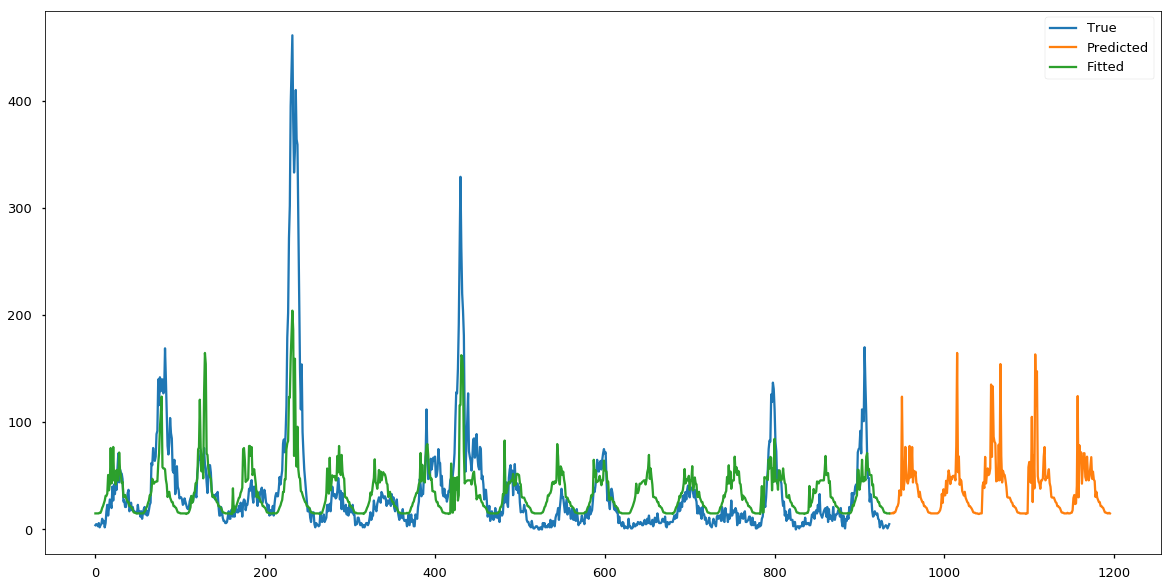

In [392]:
sj_GB_mod, sj_GB_fitted_vals, sj_GB_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, GB_mod)

# Fit and predict with Gradient Boosted Regressor for iq

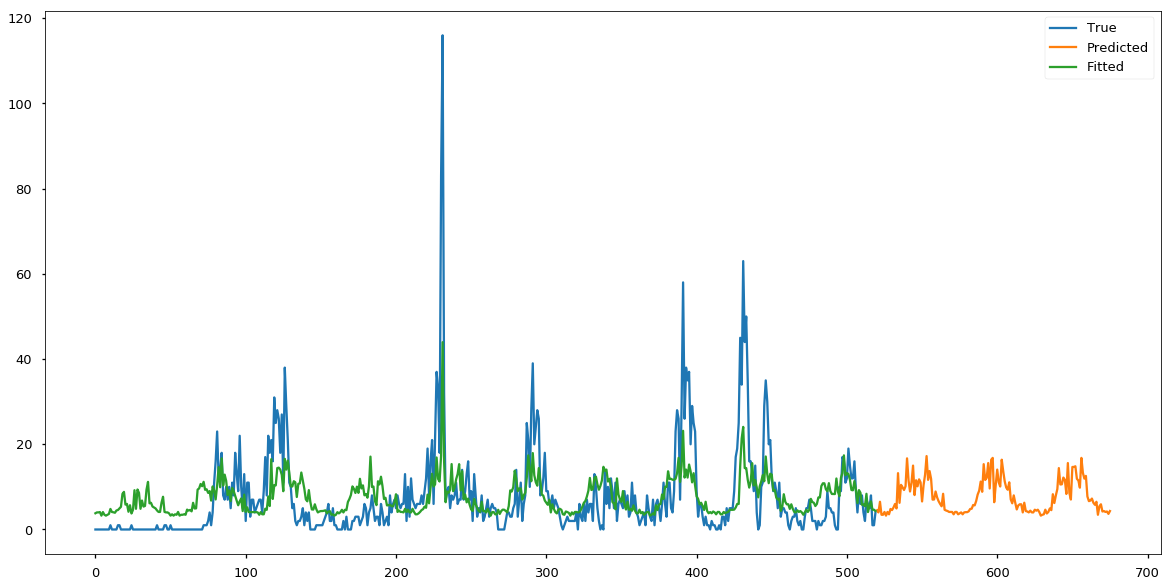

In [393]:
iq_GB_mod, iq_GB_fitted_vals, iq_GB_test_preds = fit_and_predict(iq_feature_train, iq_feature_test, GB_mod)

# Fit and predict with SVR for sj

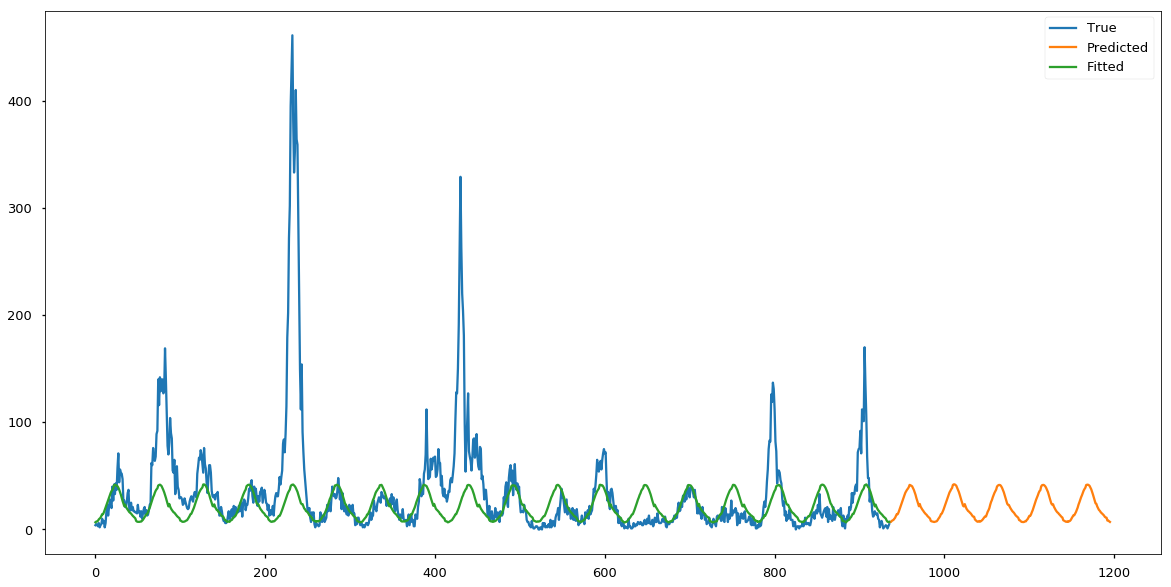

In [394]:
sj_SVR_mod, sj_SVR_fitted_vals, sj_SVR_test_preds = fit_and_predict(sj_feature_train, sj_feature_test, SVR_mod)

# Fit and predict with SVR for iq

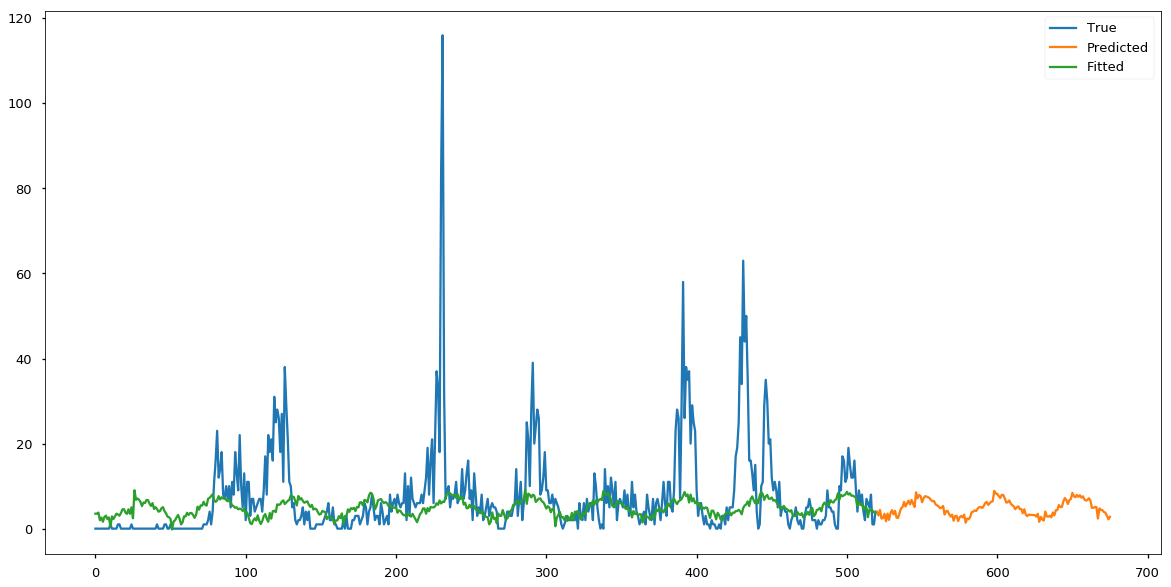

In [396]:
iq_SVR_mod, iq_SVR_fitted_vals, iq_SVR_test_preds = fit_and_predict(iq_feature_train, iq_feature_test, SVR_mod)

# Poisson Regression using Statsmodels

# Negative Binomial GLM using Statsmodels

In [314]:
import statsmodels.api as sm
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

In [315]:
from sklearn.metrics import mean_absolute_error

In [316]:
X_tr_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
X_val_sj.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)]
sj_feature_test.columns = [str(i) if not i.isdigit() else str('Num') + str(i) for i in list(sj_feature_test.columns)]

In [317]:
formula = ' + '.join([str(i) if not i.isdigit() else str('Num') + str(i) for i in list(X_tr_sj.columns)])
formula = 'y ~ ' + formula
X_tr_sj['y'] = Y_tr_sj
X_val_sj['y'] = Y_val_sj

In [318]:
model = smf.glm(formula=formula,
                data=X_tr_sj,
                family=sm.families.NegativeBinomial(alpha = 1e-8))
model = model.fit()

predictions_sj = model.predict(X_val_sj).astype(int)
print ("cv error:", mean_absolute_error(predictions_sj, Y_val_sj))

pred_train_sj = model.predict(X_tr_sj).astype(int)
print ("train error:", mean_absolute_error(pred_train_sj, Y_tr_sj))

cv error: 26.106382978723403
train error: 23.815523059617547
